# Build Graph using Cosine similarity

## imports 

In [1]:
import json

import numpy as np
import pandas as pd

import scipy.sparse as sp
from math import log
from scipy.spatial.distance import cosine

## data load

In [2]:
%%time

data_path = '../../data/summary/data/train.json'
with open(data_path, 'r') as f:
    data = [json.loads(line) for line in f]

CPU times: user 2.99 s, sys: 332 ms, total: 3.32 s
Wall time: 3.32 s


In [3]:
sample = data[0]

text = sample['doc']
labels = sample['labels']
summary = sample['summaries']

In [4]:
sentences = text.split('\n')

In [6]:
# sentences

## node-feature matrix using BERT Sentence Model

In [7]:
from sentence_transformers import models
from sentence_transformers import SentenceTransformer

In [8]:
embedder = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

100%|██████████| 405M/405M [00:49<00:00, 8.21MB/s]   


In [12]:
# tmp_text = sentences[0]
# embeddings = embedder.encode([tmp_text])

In [13]:
embeddings = embedder.encode(sentences)

## cosine similarity matrix

In [15]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [34]:
cosine_matrix = 1 - pairwise_distances(embeddings, metric="cosine")

In [36]:
# cosine_matrix

## adjacency matrix using threshold

In [46]:
threshold = 0.2

adj_matrix = (cosine_matrix > threshold) * 1

## MatMul adjacency and node-features

In [51]:
feature_matrix = np.array(embeddings)

In [52]:
adj_matrix.shape, feature_matrix.shape

((21, 21), (21, 768))

In [53]:
h_hat = np.matmul(adj_matrix, feature_matrix)

In [55]:
h_hat.shape

(21, 768)

## create Graph using Networkx

In [60]:
%matplotlib inline

import networkx as nx

import matplotlib.pyplot as plt

In [57]:
G = nx.from_numpy_matrix(adj_matrix)

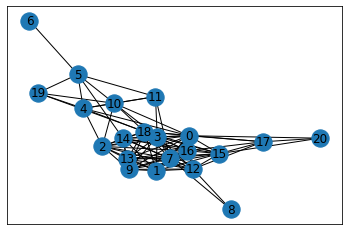

In [62]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
plt.show()

In [63]:
G.degree

DegreeView({0: 17, 1: 13, 2: 14, 3: 16, 4: 9, 5: 8, 6: 3, 7: 15, 8: 4, 9: 13, 10: 10, 11: 7, 12: 15, 13: 13, 14: 14, 15: 14, 16: 14, 17: 8, 18: 16, 19: 6, 20: 5})

In [64]:
labels = labels.split('\n')